## **🎡 Praktikum 1**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data/iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


mengimport library yang aka digunakan untuk praktikum 1: k-means (unsupervised learning) dan membaca serta menyimpan data dalam bentuk dataframe. `df.head()` untuk menampilkan 5 baris teratas dari dataframe

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

menyeleksi fitur untuk matriks fitur (independen) dan variabel target (dependen) berupa species

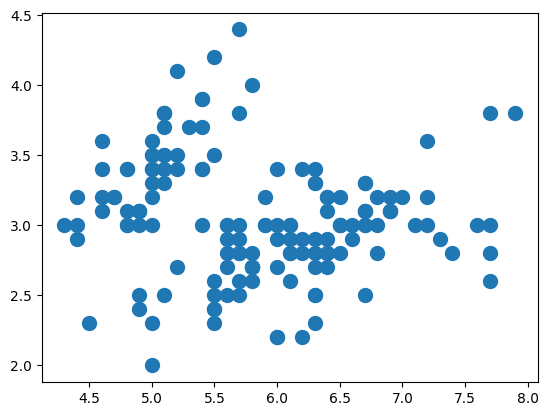

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

memplot data dari dua kolom pertama dari dataset X yang menunjukkan hubungan antara Sepal Length (panjang kelopak bunga) dan Sepal Width (lebar kelopak bunga) dari dataset. Ini memvisualisasikan data dalam dua dimensi, membantu Anda mengamati pola atau kluster yang mungkin terbentuk dari data tersebut.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

kode ini membagi dataset X ke dalam dua cluster menggunakan algoritma KMeans

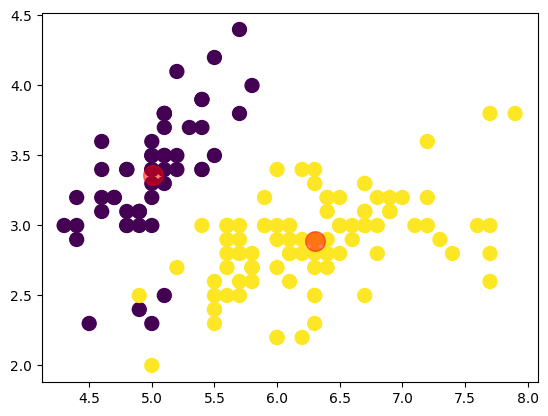

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

untuk memvisualisasikan hasil clustering KMeans yang telah Anda buat sebelumnya, dengan memplot data berdasarkan Sepal Length dan Sepal Width serta menampilkan pusat dari setiap cluster (centroids).

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


mencetak dan mengetahui mencetak nilai Sum of Squared Errors (SSE) dari model KMeans yang telah dibuat. Nilai yang dihasilkan dari menghitung inertia, menunjukkan total jarak kuadrat antara setiap titik data dan pusat cluster terdekat

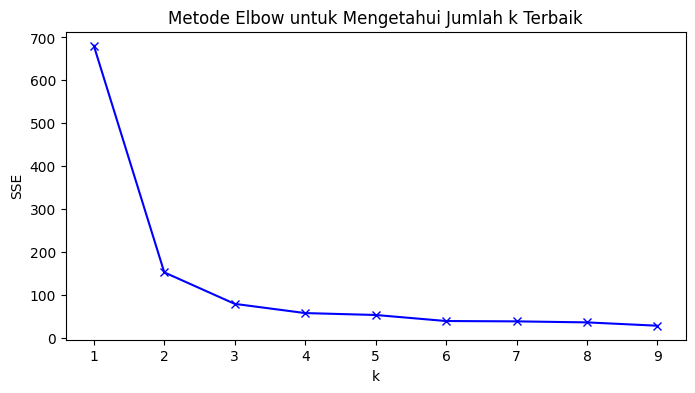

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

kode di atas mengimplementasikan metode Elbow untuk menentukan jumlah cluster (k) optimal dalam algoritma KMeans berdasarkan nilai Sum of Squared Errors (SSE) sehingga ada hubungan antara hubungan antara jumlah cluster k dan nilai SSE.

dalam plot tersebut, ada titik di mana kurva mulai "meluruskan" (berubah dari menurun tajam menjadi menurun lebih datar). titik tersebut disebut sebagai "elbow" dan menunjukkan jumlah cluster yang optimal. nilai SSE menurun seiring bertambahnya k dan dengan menggunakan metode elbow bisa menentukan nilai k optimal berdasarkan titik di mana penurunan SSE mulai melambat.








In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=53.01304475727365
k=6; SSE=38.93873974358975
k=7; SSE=38.15272268170426
k=8; SSE=35.768798989899004
k=9; SSE=27.99411819552998


 mencetak nilai Sum of Squared Errors (SSE) untuk setiap nilai k yang telah dihitung sebelumnya

## **🏖️ Praktikum 2**

Konsep K-Means untuk klasterisasi data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

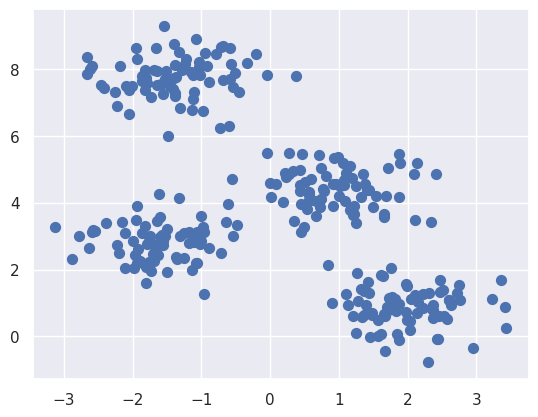

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

kode di atas menghasilkan dataset yang berisi kumpulan titik-titik data (data yang dikelompokkan dalam bentuk cluster). serta membuat plot tersebut menampilkan 300 titik yang dikelompokkan dalam 4 cluster yang berbeda, yang terdistribusi di sekitar 4 pusat. cluster akan memiliki deviasi standar yang relatif kecil, sehingga titik-titik dalam cluster tersebut akan cukup dekat satu sama lain. Plot ini sangat berguna untuk menggambarkan dan menguji algoritma clustering seperti KMeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

kode di atas menerapkan algoritma clustering KMeans pada dataset yang telah Anda buat sebelumnya menggunakan make_blobs. Dimana data dibagi menjadi 4 cluster (`KMeans(n_clusters=4)`) seesuai parameter yang ditetapkan saat membuat dataset.

`kmeans.fit(X)` untuk melatih model menggunakan dataset X

`y_kmeans = kmeans.predict(X)` untuk mengelompokkan setiap titik data dalam X ke dalam salah satu dari 4 cluster


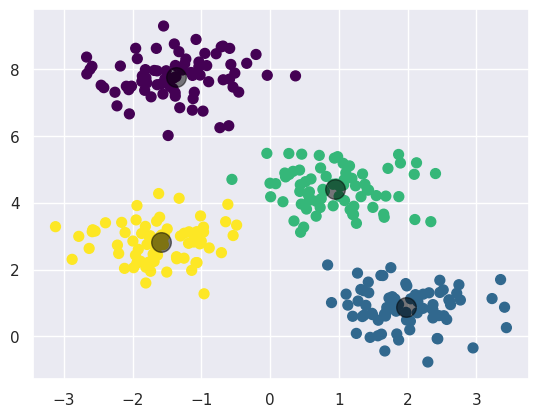

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

`plt.scatter` memplot titik data berdasarkan 2 fitur yang dikelompokkan oleh algoritma KMeans, menggunakan warna berbeda untuk setiap cluster

`kmeans.cluster_centers_` merupakan array 2D yang berisi koordinat pusat dari masing-masing cluster yang dihitung oleh model KMeans setelah proses pelatihan.

`plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)` untuk memplot pusat cluster pada posisi yang telah dihitung oleh KMeans dengan warna hitam




**Algoritma Expectation-Maximization**

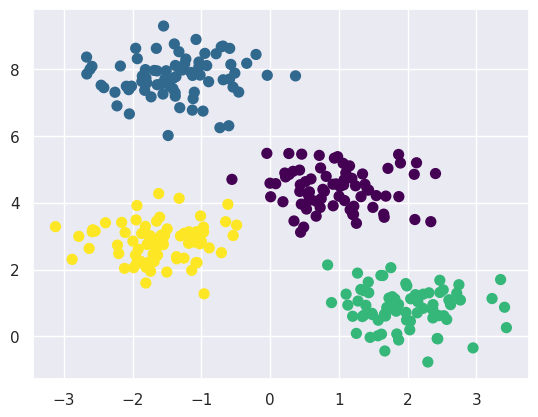

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

kode tersebut merupakan implementasi manual dari algoritma KMeans untuk menemukan cluster dalam dataset.

**Line 5-7** untuk menginisialisasi pusat cluster secara acak dengan cara yang terkontrol

*   rng = np.random.RandomState(rseed) membuat sebuah objek generator angka acak yang dikendalikan oleh nilai random seed yang sama

*   `i = rng.permutation(X.shape[0])[:n_clusters]` mengacak urutan indeks titik data untuk memastikan bahwa pusat cluster yang dipilih acak dan tidak terpengaruh oleh urutan awal data

*   `centers = X[i]` mengambil titik-titik data dari dataset X yang sesuai dengan indeks yang telah diacak dan dipilih sebelumnya.

**Line 9-22** menghasilkan fungsi untuk menentukan pusat claster

*   `labels = pairwise_distances_argmin(X, centers)` menghitung label cluster untuk setiap titik data berdasarkan jarak mereka ke pusat cluster untuk  menetapkan setiap titik ke cluster terdekat.

*   `new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])` menghitung pusat cluster baru dengan mengambil rata-rata posisi dari semua titik yang termasuk dalam cluster tertentu. Ini membantu memperbaiki posisi pusat cluster berdasarkan titik data yang telah dikelompokkan.

*   `if np.all(centers == new_centers):
    break
centers = new_centers` untuk menghentikan iterasi ketika pusat cluster telah konvergen (tidak berubah)

*   `return centers, labels` mengembalikan pusat cluster yang telah ditemukan dan label yang ditetapkan untuk setiap titik data.

**Line 23-24**

memanggil fungsi find_clusters untuk melakukan clustering pada dataset X dengan 4 cluster. Kemudian divisualisasikan menggunakan plot sebar, di mana warna titik mencerminkan cluster yang ditetapkan




**Perubahan random**

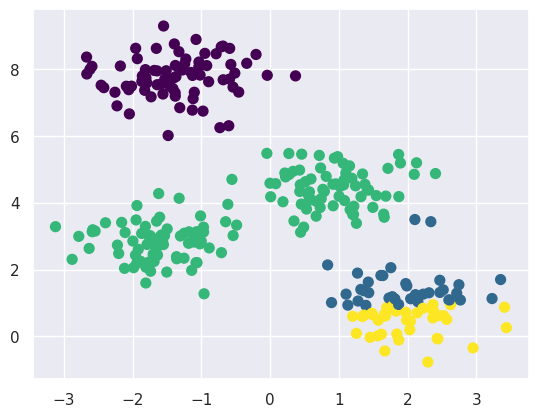

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

`find_clusters(X, 4, rseed=0)` memanggil fungsi untuk mencari 4 cluster dalam dataset X.

`plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');` membuat plot sebar (scatter plot) untuk memvisualisasikan hasil clustering.

**Optimalisasi Jumlah Klaster**

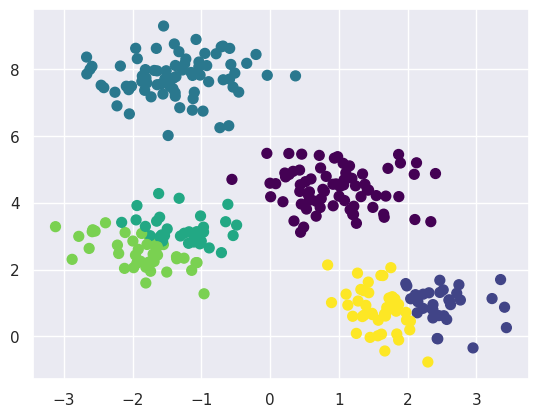

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

`KMeans(6, random_state=0)` membuat objek KMeans untuk menemukan 6 cluster. random_state=0 memastikan hasil yang sama setiap kali kode dijalankan dengan inisialisasi acak yang dikendalikan. Kemudian fit_predict untuk melatih model KMeans

`plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');` membuat plot sebar (scatter plot) untuk memvisualisasikan hasil clustering.



**Batas Klaster yang Tidak Selalu Linier**

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

`X, y = make_moons(200, noise=.05, random_state=0)` membuat dataset berbentuk bulan sabit ganda (moons), di mana data memiliki dua kelas yang sulit dipisahkan dengan metode linear.




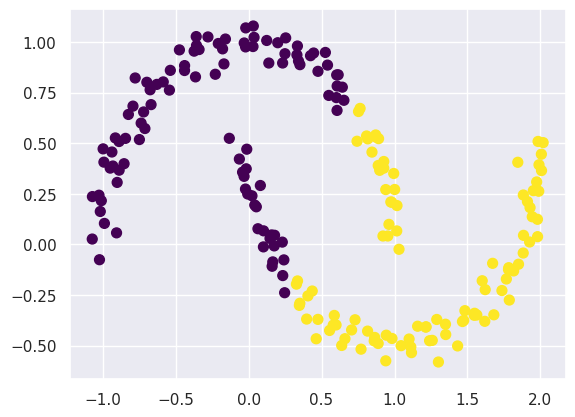

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

`labels = KMeans(2, random_state=0).fit_predict(X)` menggunakan KMeans untuk membagi data ke dalam 2 cluster dan melatih serta memprediksi cluster untuk setiap titik data.

`plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')` digunakan untuk membuat scatter plot untuk memvisualisasikan hasil clustering




/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


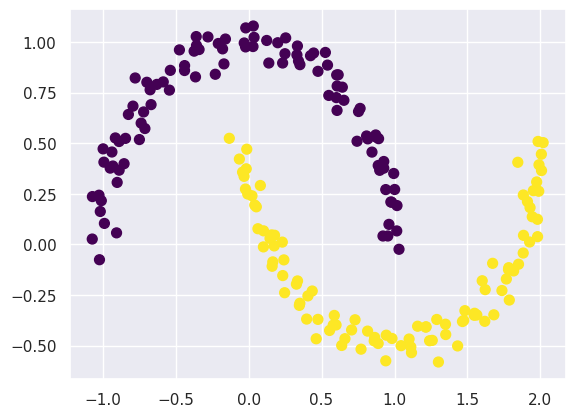

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

`model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')` untuk membuat model Spectral Clustering yaang mana membagi dataset menjadi 2 cluster, yang mana menggunakan k-nearest neighbors untuk menentukan hubungan antara titik-titik data.

`labels = model.fit_predict(X)` melakukan clustering pada dataset X menggunakan model Spectral Clustering.

`plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')` membuat scatter plot untuk memvisualisasikan hasil clustering.


**Contoh Kasus 1: Karakter Angka**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

`load_digits()` digunakan untuk memuat dataset digit tulisan tangan.

`digits.data.shape` mengembalikan dimensi dari dataset digit.


In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

`kmeans = KMeans(n_clusters=10, random_state=0)` digunakan untuk membuat model K-Means yang akan mencari 10 cluster dalam data.

`clusters = kmeans.fit_predict(digits.data)` melakukan clustering pada data digit dan memprediksi cluster untuk setiap gambar.

`kmeans.cluster_centers_.shape` untuk menampilkan dimensi dari pusat cluster yang ditemukan oleh K-Means.





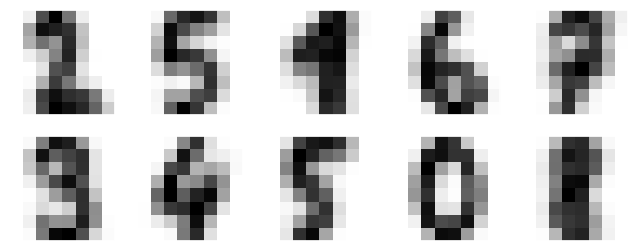

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

`plt.subplots(2, 5)` membuat grid plot dengan 2 baris dan 5 kolom sesuai dengan jumlah cluster dengan figsize=(8, 3) menandakan bahwa ukuran figure plot 8 x 3.

`centers = kmeans.cluster_centers_.reshape(10, 8, 8)` mengubah bentuk pusat cluster, yang dihasilkan oleh K-Means, di mana setiap baris mewakili pusat dari satu cluster, dari vektor 1D menjadi matriks 8x8 sehingga tiap baris (pusat cluster) bisa divisualisasikan sebagai gambar.

looping for digunakan untuk menampilkan setiap pusat cluster sebagai gambar dalam subplot

`for axi, center in zip(ax.flat, centers)`:
* `ax.flat` mengubah array 2D ax (yang berisi subplot) menjadi array 1D untuk iterasi yang lebih mudah.
* `centers` array berisi 10 pusat cluster, yang masing-masing merupakan gambar 8x8.
* `axi.set(xticks=[], yticks=[]):` menghapus label sumbu x dan y untuk membuat visualisasi lebih bersih.
* `axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)`
`center` menampilkan gambar pusat cluster (8x8) dalam subplot.
* `interpolation='nearest'` menggunakan interpolasi "nearest" untuk menampilkan gambar tanpa smoothing.
* `cmap=plt.cm.binary` menampilkan gambar dalam skema warna hitam-putih (binary colormap).









In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Kode ini bertujuan untuk **mengaitkan label asli digit** (0-9) dengan **cluster** yang dihasilkan oleh algoritma K-Means. Meskipun K-Means adalah metode unsupervised (tidak menggunakan label selama pelatihan), setelah proses clustering selesai, kita dapat membandingkan cluster dengan label sebenarnya untuk melihat sejauh mana cluster tersebut sesuai dengan digit yang diinginkan.

```python
labels = np.zeros_like(clusters)
```
- Inti: Membuat array `labels` dengan ukuran yang sama dengan array `clusters` untuk menyimpan label digit hasil modifikasi.
- Penjelasan:
  - `np.zeros_like(clusters)`: Membuat array berisi nol dengan ukuran yang sama dengan array `clusters`. Setiap elemen dalam array ini nantinya akan diisi dengan label digit yang sesuai (0 hingga 9).
  - `clusters`: Array hasil clustering dari K-Means, yang berisi label cluster untuk setiap gambar digit.

```python
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
```
Melakukan pemetaan antara setiap cluster dan label digit yang paling sering muncul dalam cluster tersebut.
- Penjelasan:
  - `for i in range(10)`: Loop ini berjalan untuk setiap cluster (0 hingga 9), karena ada 10 cluster yang dihasilkan oleh K-Means.
  - `mask = (clusters == i)`: Membuat array boolean `mask` yang bernilai `True` untuk semua titik data yang berada dalam cluster ke-`i`. Ini digunakan untuk memfilter data yang termasuk dalam cluster tersebut.
  - `mode(digits.target[mask])[0]`:
    - `digits.target[mask]`: Mengambil label asli dari data digit yang ada dalam cluster ke-`i`.
    - `mode()`**: Mengambil nilai yang paling sering muncul (modus) di antara label asli dalam cluster tersebut.
      - Ini penting karena cluster mungkin tidak sepenuhnya homogen. Misalnya, cluster 0 mungkin berisi sebagian besar gambar digit 5, tetapi ada juga beberapa gambar digit lainnya. Mode memilih label yang paling dominan dalam cluster.
      - `[0]`: Mengambil elemen modus itu sendiri dari hasil (karena `mode()` mengembalikan tuple).
  - `labels[mask] = ...`: Memasukkan label digit hasil modifikasi ke dalam array `labels` untuk titik-titik data yang termasuk dalam cluster ke-`i`.

- Loop ini memastikan bahwa setiap titik data dalam cluster diberi label digit yang paling sering muncul di cluster tersebut, berdasarkan data label asli dari `digits.target`.
- Akhirnya, array `labels` akan berisi label digit yang sesuai dengan cluster dari hasil K-Means, tetapi sekarang lebih konsisten dengan label digit asli (0-9).

- Kode ini menggunakan **modus** untuk mengaitkan **cluster K-Means** dengan **label digit yang paling umum** di setiap cluster.
- Dengan melakukan ini, kita dapat memetakan cluster yang dihasilkan oleh K-Means ke digit-digit yang sebenarnya dan membandingkan kinerja model dengan label ground truth.
- Setelah proses ini, setiap titik data diberi label digit yang paling dominan dalam cluster, sehingga kita bisa mengevaluasi sejauh mana K-Means mampu mengenali pola digit-digit tulisan tangan.



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

* accuracy_score digunakan untuk mengevaluasi performa clustering K-Means dengan membandingkan hasil clustering (labels) dengan label asli (digits.target).

* Nilai akurasi yang tinggi berarti model K-Means cukup baik dalam mengelompokkan gambar digit sesuai dengan label digit sebenarnya, meskipun prosesnya unsupervised (tanpa menggunakan label saat pelatihan).







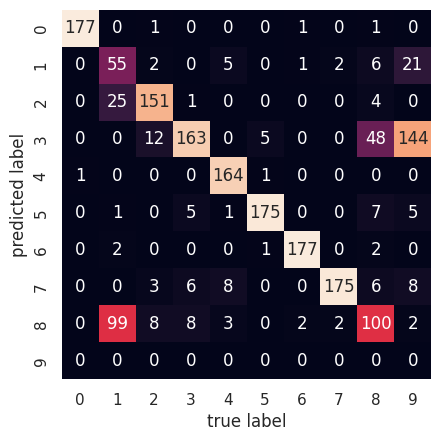

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Kode ini bertujuan untuk menampilkan **confusion matrix** dalam bentuk **heatmap**. Confusion matrix memberikan gambaran terperinci tentang bagaimana prediksi K-Means sesuai dengan label digit asli.. Heatmap mewakili jumlah prediksi untuk kombinasi label asli dan label prediksi. Diagonal dari heatmap (kiri atas ke kanan bawah) menunjukkan jumlah prediksi yang benar (di mana label asli dan prediksi cocok). Nilai-nilai di luar diagonal menunjukkan prediksi yang salah (misclassifications)

- kode `mat = confusion_matrix(digits.target, labels)` membuat confusion matrix berdasarkan label asli (`digits.target`) dan label hasil clustering (`labels`).
  - `confusion_matrix()` merupakan fungsi dari *scikit-learn* yang menghitung jumlah prediksi yang benar dan salah antara prediksi model (labels hasil clustering) dan label sebenarnya (target label).
  - Output dari kode di atas berupa matrix 2D yang merepresentasikan jumlah prediksi di setiap kombinasi label asli dan prediksi. Setiap elemen \((i, j)\) dalam matriks menunjukkan berapa kali label asli \(i\) diprediksi sebagai \(j\).

```python
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
```
- untuk menampilkan confusion matrix dalam bentuk visual menggunakan heatmap.
  - `sns.heatmap()` merupakan fungsi dari *seaborn* untuk membuat heatmap.
  - `mat.T` merupakan transpose dari matriks confusion matrix (`mat`). Transpose diperlukan agar sumbu x merepresentasikan label asli dan sumbu y merepresentasikan label prediksi.
  - `square=True` membuat setiap sel dalam heatmap berbentuk kotak (bujur sangkar).
  - `annot=True` menampilkan nilai di setiap sel heatmap.
  - `fmt='d'` menampilkan nilai sebagai bilangan bulat.
  - `cbar=False` menyembunyikan colorbar di samping heatmap.
  - `xticklabels=digits.target_names` dan `yticklabels=digits.target_names` memberi label pada sumbu x dan y dengan angka asli (0-9) dari dataset.

```python
plt.xlabel('true label')
plt.ylabel('predicted label')
```
- memberi label pada sumbu x dan y.
  - sumbu x (`true label`) menunjukkan label asli dari data digit (0-9).
  - sumbu y (`predicted label`) menunjukkan label yang diprediksi oleh model (cluster hasil K-Means).



In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

Kode ini menerapkan **t-SNE** untuk mereduksi dimensi data digit tulisan tangan sebelum menerapkan algoritma **K-Means** untuk clustering

##### **1. Reduksi Dimensi dengan t-SNE**
```python
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
```
- t-SNE digunakan untuk mereduksi dimensi dari data digit yang awalnya berukuran 64 (8x8 piksel) menjadi 2 dimensi.
  - `TSNE(n_components=2)` membuat objek t-SNE yang akan mereduksi data menjadi 2 dimensi.
  - `init='random'` menginisialisasi posisi awal titik data secara acak dalam dimensi baru.
  - `random_state=0` mengatur seed untuk memastikan hasil yang dapat direproduksi.
  - `tsne.fit_transform(digits.data)` menerapkan t-SNE pada `digits.data` dan mengembalikan data yang telah direduksi dimensinya. `digits.data` terdiri dari gambar digit yang di-flatten menjadi vektor 1D dari 64 fitur (8x8 piksel). Hasilnya disimpan dalam `digits_proj`.

##### **2. Clustering dengan K-Means**
```python
# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
```
- menerapkan algoritma K-Means pada data yang telah direduksi dimensi (hasil t-SNE).
  - `KMeans(n_clusters=10)` membuat objek KMeans untuk mengelompokkan data menjadi 10 cluster, yang sesuai dengan 10 digit (0-9).
  - `kmeans.fit_predict(digits_proj)` melatih model K-Means menggunakan data 2D dari t-SNE dan memprediksi label cluster untuk setiap data. Hasilnya disimpan dalam `clusters`.

##### **3. Permutasi Label untuk Menyesuaikan dengan Label Asli**
```python
# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
```
- mengaitkan label cluster yang dihasilkan oleh K-Means dengan label digit asli.
  - `np.zeros_like(clusters)` membuat array `labels` berisi nol dengan ukuran yang sama dengan `clusters`.
  - `for i in range(10)` iterasi untuk setiap cluster (0 hingga 9).
  - `mask = (clusters == i)` membuat array boolean untuk menemukan titik data yang termasuk dalam cluster ke-i.
  - `mode(digits.target[mask])[0]` menghitung modus dari label asli untuk data dalam cluster tersebut. Ini memberikan label digit yang paling umum di dalam cluster.
  - `labels[mask] = ...` menetapkan label yang sesuai untuk semua titik dalam cluster ke-i.

##### **4. Menghitung Akurasi**
`accuracy_score(digits.target, labels)` menghitung akurasi dari clustering K-Means dengan membandingkan `digits.target` (label asli) dengan `labels` (label yang dihasilkan). Nilai akurasi dalam bentuk desimal (0 hingga 1), di mana 1 berarti semua prediksi benar.

**Studi Kasus 2: Kompresi Citra**

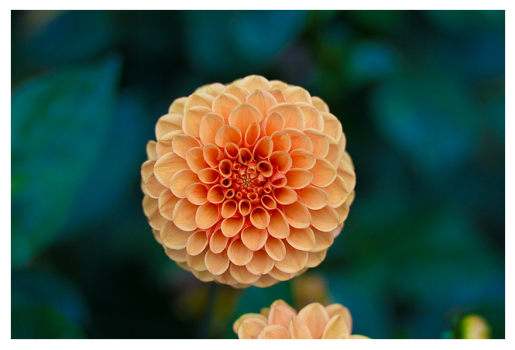

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

Kode ini menunjukkan bagaimana kita dapat **memuat** dan **menampilkan** gambar yang disediakan oleh *scikit-learn*. Ini berguna untuk berbagai aplikasi visualisasi atau eksperimen dengan gambar, seperti pengolahan gambar menggunakan algoritma machine learning.
##### 1. **Memuat Gambar Contoh dari Dataset `scikit-learn`**
```python
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
```
- Memuat gambar bunga yang disediakan oleh *scikit-learn*.
  - `load_sample_image()` merupakan fungsi ini memuat salah satu dari dua gambar contoh yang tersedia di *scikit-learn* (`"china.jpg"` dan `"flower.jpg"`). Dalam hal ini, gambar `"flower.jpg"` (gambar bunga) dimuat.
  - `flower` merupakan array NumPy 3D yang mewakili gambar. Array ini berisi nilai RGB dari setiap piksel dalam gambar.

##### 2. **Menampilkan Gambar**
```python
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);
```
- Menampilkan gambar bunga tanpa sumbu.
  - `plt.axes(xticks=[], yticks=[])` membuat objek *axes* dari Matplotlib, tetapi menghilangkan tanda sumbu `xticks` dan `yticks` agar tampilan gambar lebih bersih tanpa angka di tepi.
  - `ax.imshow(flower)` menampilkan gambar yang dimuat (`flower`) di dalam objek *axes* `ax` menggunakan fungsi `imshow()`.
  - `;`: Pada akhir kode digunakan untuk menyembunyikan output teks yang mungkin ditampilkan.

In [ ]:
flower.shape

(427, 640, 3)

menampilkan ukuran gambar flower yaitu 427 x 640 piksel dengan 3 channel warna (RGB).


In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Kode ini menunjukkan teknik kuantisasi warna menggunakan MiniBatch K-Means untuk mengurangi jumlah warna dalam gambar.
  - `flower / 255.0` membagi setiap nilai piksel dengan 255 untuk mengubah rentang warna dari [0, 255] ke [0, 1], yang umum dalam pemrosesan gambar.
  - `data.reshape(427 * 640, 3)` mengubah bentuk data dari (427, 640, 3) menjadi (273280, 3), di mana setiap baris mewakili satu piksel dengan tiga nilai (R, G, B).
  - `data.shape` menampilkan ukuran gambar, yang mana menunjukkan (273280, 3) yang mana merupakan ukuran terbaru


In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Fungsi `plot_pixels()` digunakan untuk memvisualisasikan distribusi piksel warna dari citra berdasarkan komponen warna RGB (Red, Green, Blue). Fungsinya:
1. Memilih secara acak hingga 10.000 piksel dari data citra.
2. Membuat dua scatter plot:
   - Plot pertama menunjukkan hubungan antara komponen warna Red dan Green.
   - Plot kedua menunjukkan hubungan antara Red dan Blue.
3. Visualisasi ini membantu menganalisis distribusi warna pada citra dengan membandingkan komponen warna tersebut.

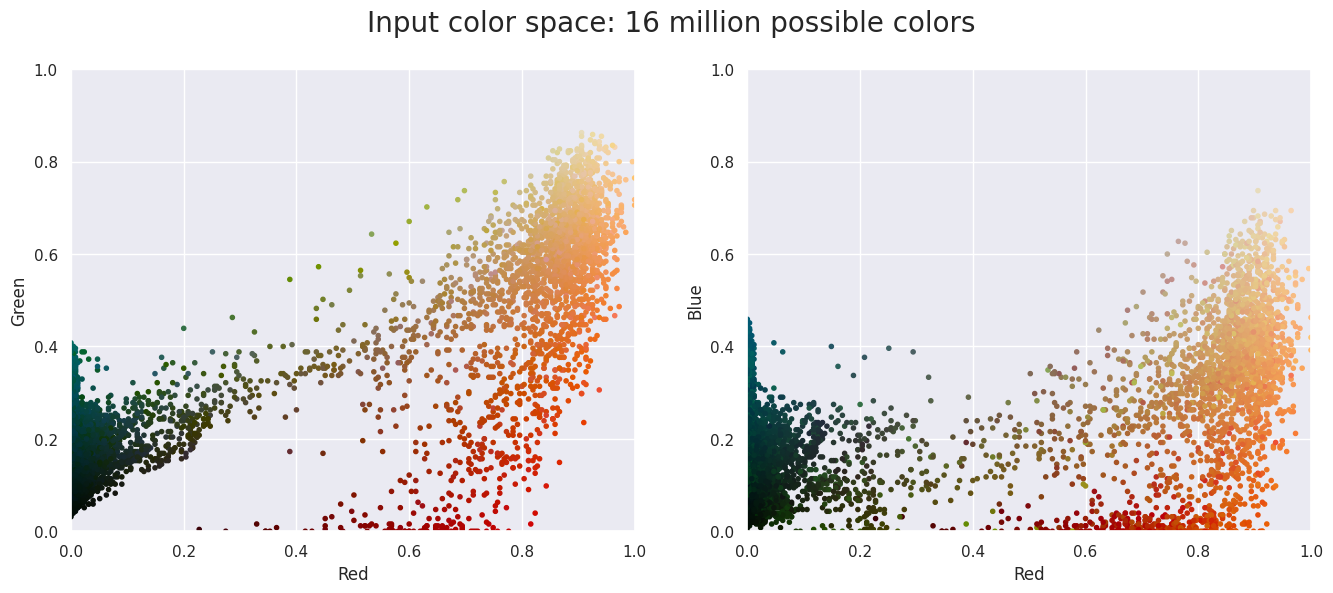

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Gambar menunjukkan dua scatter plot dari hasil fungsi `plot_pixels()`, yang memvisualisasikan distribusi warna piksel:

- Plot kiri menunjukkan hubungan antara komponen Red dan Green. Titik-titik menggambarkan intensitas warna merah dan hijau pada piksel.
- Plot kanan mennjukkan hubungan antara Red dan Blue, menunjukkan variasi intensitas warna merah dan biru.

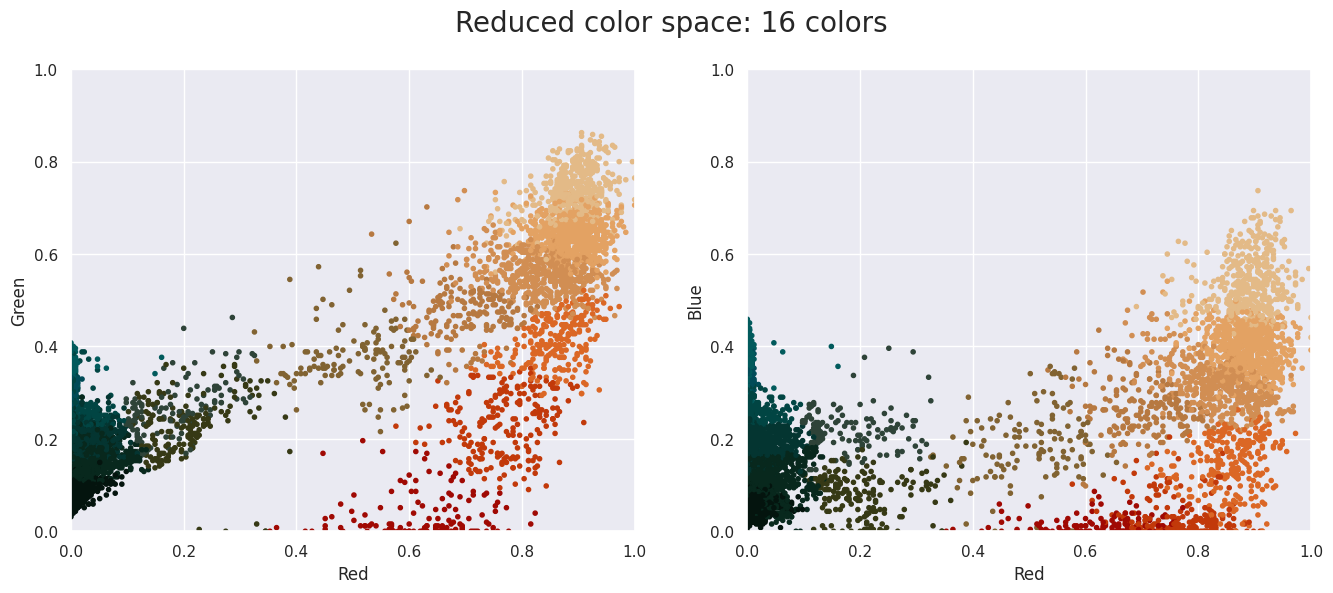

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Kode ini melakukan klustering warna pada citra menggunakan algoritma MiniBatchKMeans dengan 16 kluster.

1. MiniBatchKMeans(16): Citra di-kluster menjadi 16 warna utama, mengurangi kompleksitas warna dari citra asli.
2. new_colors: Setiap piksel diubah ke warna kluster terdekat (centroid), sehingga citra hanya memiliki 16 warna yang representatif.
3. plot_pixels(): Visualisasi scatter plot menggunakan warna hasil klusterisasi (16 warna), menggantikan warna asli piksel.

Meskipun plot tetap sama dalam bentuk, warnanya kini terbatas hanya pada 16 warna, mencerminkan reduksi warna dari citra asli.

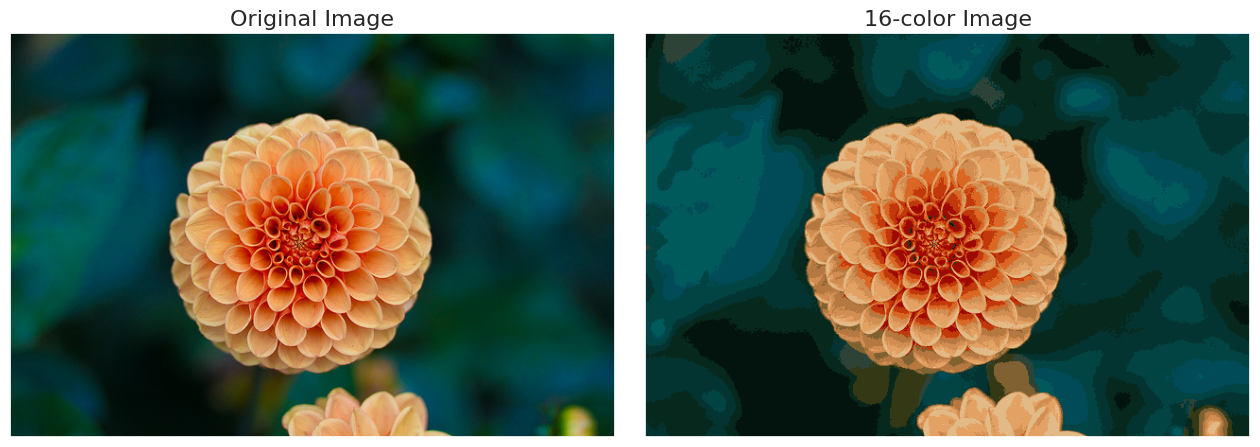

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

1. Kiri (Original Image): Citra asli dengan spektrum warna penuh, menunjukkan detail dan variasi warna yang halus.
2. Kanan (16-color Image): Citra yang direduksi menjadi 16 warna melalui **MiniBatchKMeans**, menghasilkan gambar dengan warna lebih sedikit dan blok-blok warna yang lebih sederhana. Detail halus pada latar belakang hilang, tetapi fitur utama bunga tetap jelas.

Proses ini mengurangi kompleksitas warna tanpa menghilangkan bentuk utama.

## **🏜️ Praktikum 3**

Self-optimizing Map (SOM)

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=439b0a9df4cd851dd779d04c20702764fd767926a73e4a473acee27fda8ae6b2
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Memuat dataset Iris yang terdiri dari 150 sampel, di mana setiap sampel memiliki 4 fitur yang menggambarkan karakteristik bunga Iris (panjang dan lebar kelopak serta sepal). Data disimpan di variabel data.



In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

Kode di atas menormalisasi data dengan membagi setiap kolom dengan nilai maksimal di kolom tersebut. Hal ini membuat nilai di setiap fitur memiliki skala antara 0 dan 1, yang penting dalam banyak algoritma machine learning agar fitur tidak mendominasi karena perbedaan skala

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

kode di atas digunakan untuk membuat peta SOM dengan ukuran 10x10 node. parameter yang digunakan :

- `map_size`: Ukuran peta SOM (10x10 grid).
- `data.shape[1]`: Jumlah fitur pada dataset (4 fitur).
- `sigma=0.5`: Parameter untuk menentukan seberapa jauh pengaruh dari satu node yang diaktifkan terhadap node-node tetangganya di peta SOM.
- `learning_rate=0.5`: Kecepatan pembelajaran untuk menyesuaikan bobot node.


In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Kode ini menginisialisasi bobot peta SOM secara acak berdasarkan rentang nilai di dataset yang diberikan.

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Baris ini melatih SOM menggunakan metode train_random. Pada proses pelatihan, data dilatih secara acak selama 100 iterasi (num_epochs). Selama pelatihan, bobot di setiap node SOM disesuaikan berdasarkan sampel data yang terdekat dengan node tersebut.



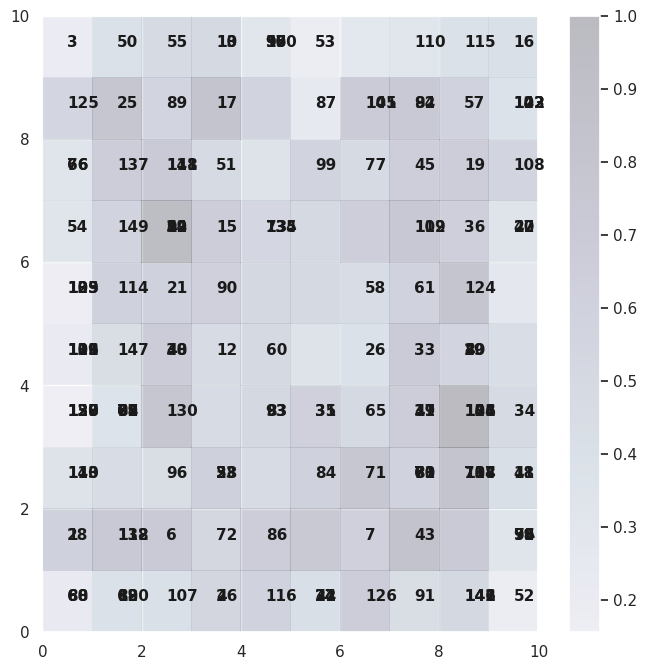

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

```python
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
  w = som.winner(x)  # Pemenang untuk sampel x
  plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
```
- **`som.winner(x)`**: Menentukan node pemenang (Best Matching Unit) untuk setiap sampel data `x`. Node pemenang adalah node di peta SOM yang memiliki bobot paling dekat dengan sampel tersebut.
- **`plt.text()`**: Menempatkan teks di posisi node pemenang. Teks yang ditampilkan adalah indeks dari setiap sampel (i+1), dengan warna hitam (`'k'`) dan ukuran huruf yang lebih besar (`size=11`).

```python
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
```
- **`som.distance_map()`**: Menghasilkan peta jarak (distance map), yang memberikan informasi tentang seberapa jauh bobot dari setiap node dengan tetangganya. Bagian ini membantu dalam mengidentifikasi batas klaster, di mana jarak antara node yang besar dapat menunjukkan batas antar kelompok.
- **`plt.pcolor()`**: Memetakan peta jarak ke warna menggunakan skema warna (`cmap='bone_r'`), dengan sedikit transparansi (`alpha=.2`).
- **`plt.colorbar()`**: Menambahkan bar warna untuk menunjukkan skala jarak antar node di SOM.

`plt.show()` menampilkan visualisasi peta SOM dengan setiap node yang berisi indeks sampel, serta peta jarak yang membantu dalam mengidentifikasi struktur klaster di data.

## **🏕️ Praktikum 4**

Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.

Kode di bawah ini memuat citra Lenna, melatih Self-Organizing Map pada citra tersebut, dan kemudian menampilkan hasil bobot SOM yang sudah dilatih. Setiap bagian bertugas membentuk, melatih, dan memperbarui grid neuron SOM agar dapat merepresentasikan pola warna dari citra dengan cara yang terstruktur.

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=014dbabaaefa8ee3b071b5d6cf1d52c7c3bb94d7ad0ce9a0a03ce15b38237392
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


Menginstal pustaka minisom, yang merupakan implementasi algoritma Self-Organizing Map (SOM) di Python. SOM adalah teknik pembelajaran tanpa pengawasan yang sering digunakan untuk pengurangan dimensi dan klasterisasi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])


- **`initialize_weights`**: Fungsi ini bertugas menginisialisasi bobot peta SOM secara acak.
- **`input_shape`**: Bentuk (shape) dari input, yaitu citra yang memiliki dimensi `(tinggi, lebar, jumlah kanal warna)`, di mana jumlah kanal biasanya 3 (RGB).
- **`output_shape`**: Bentuk dari SOM yang akan kita buat, yaitu ukuran grid dari SOM, misalnya (10x10), dan juga jumlah kanal yang sama dengan citra (3 kanal untuk RGB).
- **`np.random.rand`**: Menghasilkan array dengan nilai acak antara 0 dan 1, dengan bentuk sesuai dengan `output_shape`. Ini adalah bobot awal SOM, di mana setiap neuron di grid SOM memiliki bobot yang merepresentasikan fitur warna.



In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)


- **`calculate_distance`**: Fungsi ini menghitung jarak Euclidean antara vektor input (nilai piksel dari citra) dan bobot dari neuron-neuron di peta SOM.
- **`input_vector`**: Ini adalah vektor yang merepresentasikan warna dari satu piksel di citra (misalnya, nilai RGB dari piksel tersebut).
- **`weights`**: Bobot neuron-neuron di SOM.
- **`np.linalg.norm`**: Ini menghitung norma Euclidean (jarak Euclidean) antara `input_vector` dan setiap bobot neuron SOM. Hasilnya adalah array 2D yang menunjukkan jarak setiap neuron terhadap vektor input. Fungsi ini digunakan untuk menentukan neuron mana yang memiliki jarak terdekat dengan vektor input.


In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

- **`find_winner_unit_in_image`**: Fungsi ini menemukan **unit pemenang** atau **Best Matching Unit (BMU)**, yaitu neuron yang bobotnya paling dekat dengan vektor input.
- **`calculate_distance`**: Menghitung jarak antara vektor input dan setiap bobot di SOM.
- **`np.argmin(distances)`**: Mengambil indeks dari jarak terkecil, yang berarti neuron dengan bobot terdekat dengan input.
- **`np.unravel_index`**: Mengubah indeks satu dimensi menjadi dua dimensi (baris dan kolom), sehingga dapat mengidentifikasi posisi neuron di grid SOM.


In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

- **`update_weights`**: Fungsi ini memperbarui bobot SOM berdasarkan unit pemenang dan tetangganya.
- **`winner`**: Posisi neuron pemenang di grid SOM.
- **`learning_rate`**: Kecepatan pembelajaran yang mengontrol seberapa cepat bobot berubah menuju input.
- **`neighborhood_radius`**: Radius pengaruh yang menentukan seberapa besar pengaruh perubahan bobot pada tetangga unit pemenang.
- **`np.indices`**: Menghasilkan koordinat grid untuk neuron-neuron SOM. Lalu, kita menghitung jarak dari neuron pemenang ke setiap neuron di SOM menggunakan **`np.linalg.norm`**.
- **`influence`**: Nilai pengaruh dihitung dengan fungsi eksponensial berdasarkan jarak neuron-neuron ke unit pemenang. Semakin dekat neuron dengan pemenang, semakin besar pengaruhnya.
- **Pembaharuan Bobot**: Bobot diperbarui dengan menambahkan nilai perubahan yang sebanding dengan pengaruh dan perbedaan antara vektor input dan bobot neuron.


In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

- **`train_som`**: Fungsi ini melatih SOM menggunakan citra input melalui beberapa epoch.
- **Parameter Epoch**: Fungsi ini dijalankan dalam loop untuk beberapa `num_epochs`, di mana pada setiap epoch:
  - **`learning_rate`**: Nilai kecepatan pembelajaran dikurangi secara eksponensial seiring bertambahnya epoch, agar model lebih stabil di akhir pelatihan.
  - **`neighborhood_radius`**: Radius pengaruh juga berkurang secara eksponensial, sehingga di akhir pelatihan, hanya neuron yang dekat dengan pemenang yang akan diperbarui.
  - **`for i in range(input_shape[0])`**: Iterasi melalui setiap piksel dalam citra, di mana setiap vektor warna dari piksel digunakan untuk memperbarui bobot SOM.
- **Proses Pembaruan**: Untuk setiap piksel, neuron pemenang ditemukan, dan bobot dari neuron tersebut serta tetangganya diperbarui.


In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "img/Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]


- **`Lenna_path`**: Path ke file gambar **Lenna**.
- **`io.imread`**: Membaca citra dari path, dan citra dinormalisasi ke rentang [0,1] dengan membaginya dengan 255.


In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

- `Training Parameters`: Melatih SOM menggunakan 100 epoch, learning rate awal 0.1, dan neighborhood radius awal 5.


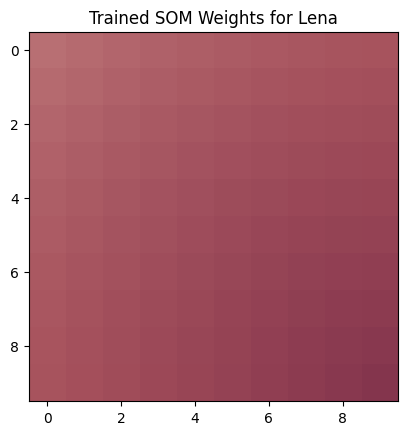

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

- **`plt.imshow(trained_weights)`**: Menampilkan bobot hasil pelatihan SOM dalam bentuk citra.
- **`plt.title`**: Menambahkan judul "Trained SOM Weights for Lenna".
- **`plt.show()`**: Menampilkan plot.

## **🏡 Tugas Praktikum**

Buatlah sebuah model K-Means dengan berbagai ketentuan:

**No 1. Gunakan data 'Mall_Customers.csv'**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**No 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)**

In [ ]:
# Seleksi fitur
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**No 3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik**

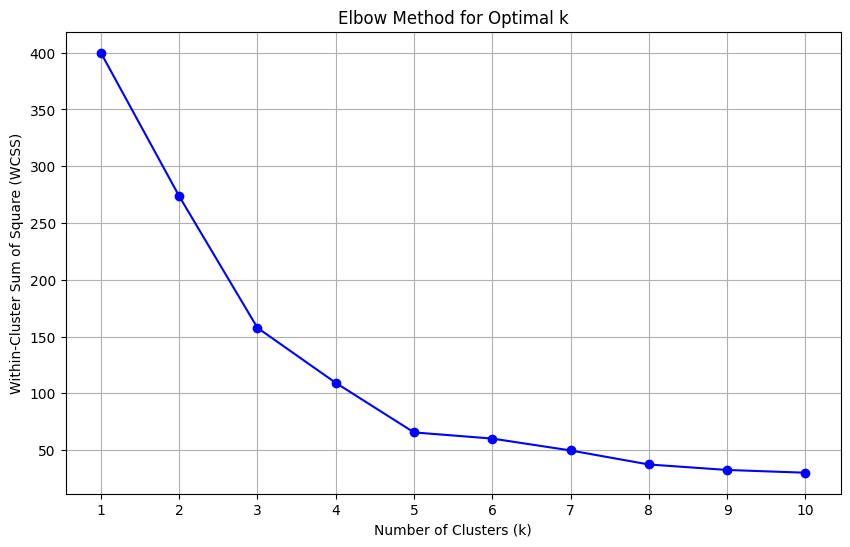

In [ ]:
# Menentukan jumlah cluster yang optimal menggunakan Elbow Method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
for idx, wcss_val in enumerate(wcss, start=1):
    print(f'k={idx}; SSE={wcss_val}')

k=1; SSE=399.99999999999994
k=2; SSE=273.66888662642003
k=3; SSE=157.70400815035939
k=4; SSE=109.22822707921345
k=5; SSE=65.56840815571681
k=6; SSE=60.132874871934206
k=7; SSE=49.668244837367965
k=8; SSE=37.31912287833882
k=9; SSE=32.495081199100916
k=10; SSE=30.05932269404222


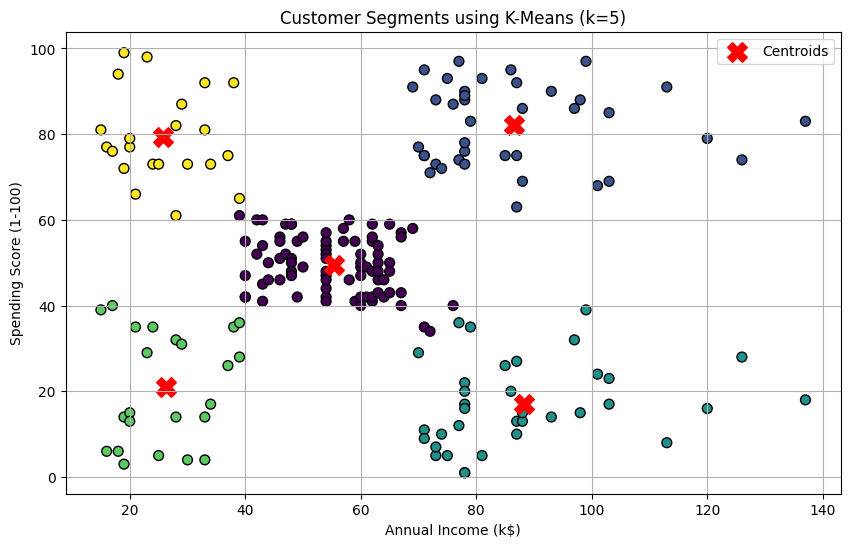

In [ ]:
# Build the KMeans model with the optimal number of clusters (k=5)
optimal_k = 5
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans_model.fit_predict(X)

# Add the cluster labels to the dataset for visualization
df['Cluster'] = clusters

# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Customer Segments using K-Means (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

**No 4. Buatlah  implementasi model SOM untuk segmentasi citra lain**

In [2]:
!pip install MiniSom

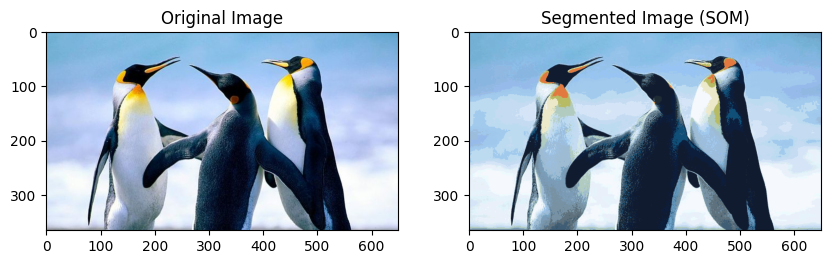

In [ ]:
import numpy as np
import cv2
from minisom import MiniSom
import matplotlib.pyplot as plt

image = cv2.imread('img/penguin.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape(-1, 3)  # Reshape menjadi array piksel dengan nilai RGB

pixels = pixels / 255.0

map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], pixels.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(pixels)

num_epochs = 500
som.train_random(pixels, num_epochs)

segmented_pixels = np.zeros(pixels.shape)
for i, px in enumerate(pixels):
    w = som.winner(px)
    segmented_pixels[i] = som.get_weights()[w]

segmented_image = segmented_pixels.reshape(image.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Segmented Image (SOM)")
plt.imshow(segmented_image)
plt.show()

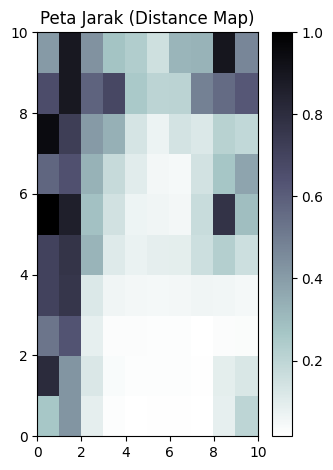

In [5]:
plt.subplot(1, 2, 1)
plt.title("Peta Jarak (Distance Map)")
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

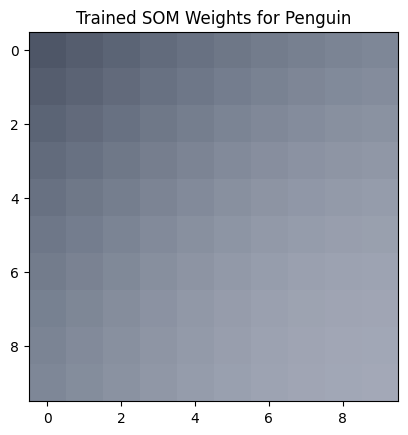

In [ ]:
img_url = "img/penguin.jpg"
img = io.imread(img_url) / 255.0

# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img, num_epochs, initial_learning_rate, initial_neighborhood_radius)

# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Penguin')
plt.show()